(k, n, α) = (20, 50, 0.05) = (20, 50, 0.05)
confint_binomia_wilson(k, n, α) = [0.27608389730256544, 0.5381856225241063]
pvalue_binomial_wilson(k, n, 0.2) = 0.0004069520174449589
pvalue_binomial_wilson(k, n, 0.5) = 0.15729920705028522
pvalue_binomial_wilson(k, n, 0.6) = 0.003892417122778635


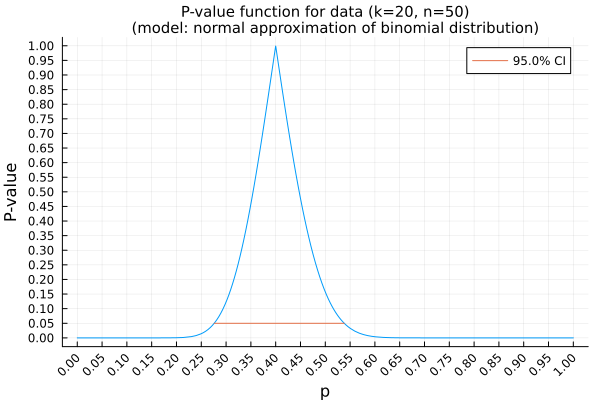

In [1]:
using Distributions
using StatsPlots
default(fmt=:png, titlefontsize=10)
safediv(x, y) = x == 0 ? zero(x/y) : x/y

function pvalue_binomial_wilson(k, n, p)
    phat, se = k/n, √(p * (1 - p) / n)
    z = safediv(phat - p, se)
    2ccdf(Normal(), abs(z))
end

function confint_binomia_wilson(k, n, α=0.05)
    phat, z = k/n, quantile(Normal(), 1-α/2)
    a, b, c = 1+z^2/n, phat+z^2/(2n), phat^2
    sqrtD = √(b^2 - a*c)
    [(b - sqrtD)/a, (b + sqrtD)/a]
end

@show k, n, α = 20, 50, 0.05
@show confint_binomia_wilson(k, n, α)
@show pvalue_binomial_wilson(k, n, 0.2)
@show pvalue_binomial_wilson(k, n, 0.5)
@show pvalue_binomial_wilson(k, n, 0.6)
plot(p -> pvalue_binomial_wilson(k, n, p), 0, 1; label="")
plot!(confint_binomia_wilson(k, n, α), fill(α, 2); label="$(100(1-α))% CI")
plot!(xtick=0:0.05:1, ytick=0:0.05:1, xrotation=45)
plot!(xguide="p", yguide="P-value")
title!("P-value function for data (k=$k, n=$n)
    (model: normal approximation of binomial distribution)")

(xbar, s2, n, α) = (170, 10 ^ 2, 128, 0.05) = (170, 100, 128, 0.05)
confint_onesample_t_test(xbar, s2, n, α) = [168.250954110334, 171.749045889666]
pvalue_onesample_t_test(xbar, s2, n, 165) = 9.719635738981693e-8
pvalue_onesample_t_test(xbar, s2, n, 168) = 0.025349827981002625
pvalue_onesample_t_test(xbar, s2, n, 172) = 0.025349827981002625
pvalue_onesample_t_test(xbar, s2, n, 175) = 9.719635738981693e-8


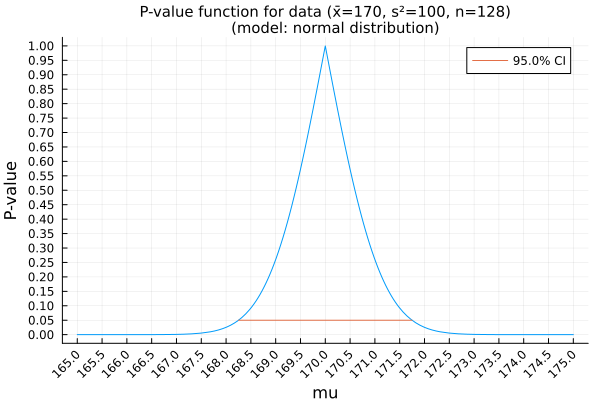

In [2]:
using Distributions
using StatsPlots
default(fmt=:png, titlefontsize=10)
safediv(x, y) = x == 0 ? zero(x/y) : x/y

function pvalue_onesample_t_test(xbar, s2, n, mu)
    t = safediv(xbar - mu, √(s2 / n))
    2ccdf(TDist(n - 1), abs(t))
end

function confint_onesample_t_test(xbar, s2, n, α=0.05)
    sehat, c = √(s2/n), quantile(TDist(n-1), 1-α/2)
    [xbar - c*sehat, xbar + c*sehat]
end

@show xbar, s2, n, α = 170, 10^2, 128, 0.05
@show confint_onesample_t_test(xbar, s2, n, α)
@show pvalue_onesample_t_test(xbar, s2, n, 165)
@show pvalue_onesample_t_test(xbar, s2, n, 168)
@show pvalue_onesample_t_test(xbar, s2, n, 172)
@show pvalue_onesample_t_test(xbar, s2, n, 175)
plot(mu -> pvalue_onesample_t_test(xbar, s2, n, mu), 165, 175; label="")
plot!(xtick=0:0.5:200, ytick=0:0.05:1, xrotation=45)
plot!(confint_onesample_t_test(xbar, s2, n, α), fill(α, 2); label="$(100(1-α))% CI")
plot!(xguide="mu", yguide="P-value")
title!("P-value function for data (x̄=$xbar, s²=$s2, n=$n)
    (model: normal distribution)")